In [161]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as r

In [162]:
#importing ML packages
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

In [163]:
#function to generate random colors
def randomColor(n):
    color = []
    colorArr = ['00','11','22','33','44','55','66','77','88','99','AA','BB','CC','DD','EE','FF']
    for _ in range(n):
        color.append('#' + colorArr[r.randint(0,15)] + colorArr[r.randint(0,15)] + colorArr[r.randint(0,15)])
    return color

In [164]:
#get datasets
traindf = pd.read_csv('/kaggle/input/titanic/train.csv')
display(traindf.head())
print(traindf.shape)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


(891, 12)


In [165]:
testdf = pd.read_csv('/kaggle/input/titanic/test.csv')
display(testdf.head())
print(testdf.shape)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


(418, 11)


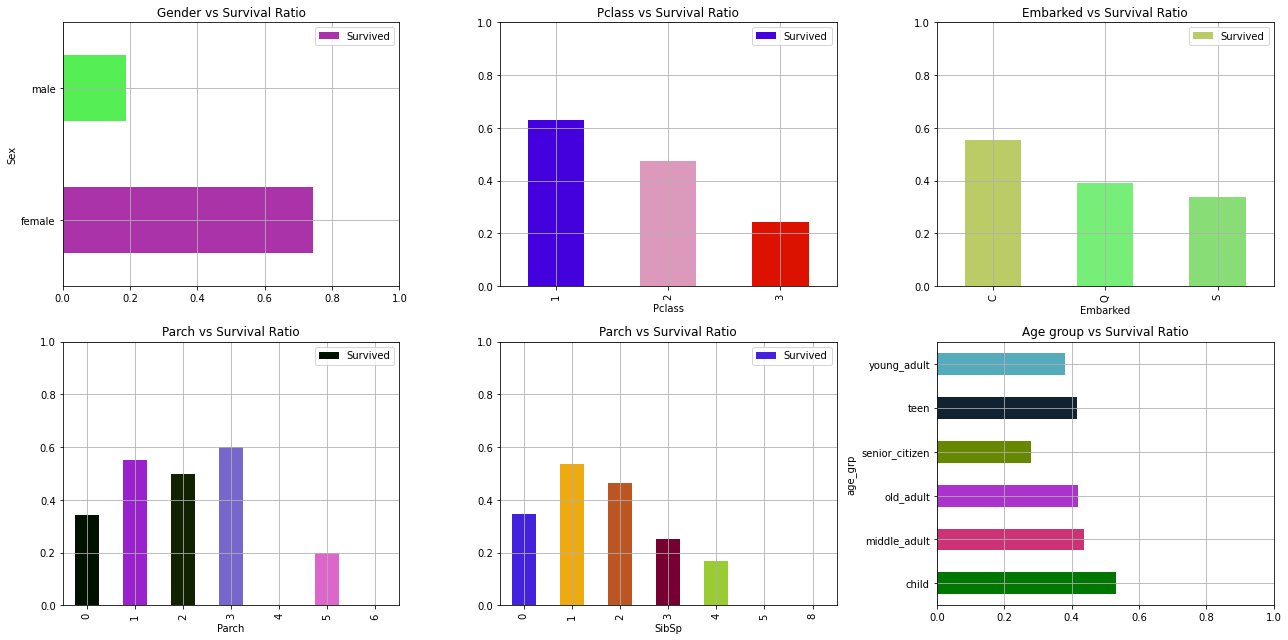

In [177]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (18,9))

#Gender vs Survuval Ratio
gender_survived = traindf[['Sex', 'Survived']].groupby('Sex').mean()
gender_survived.plot(kind='barh', 
                     color = [randomColor(len(gender_survived))], 
                     ax = axes[0,0],
                     title = 'Gender vs Survival Ratio',
                     xlim = (0,1),
                     grid = True,)

#Pclass vs Survival Ratio
pclass_survived = traindf[['Pclass', 'Survived']].groupby('Pclass').mean()
pclass_survived.plot(kind='bar', 
                     color = [randomColor(len(pclass_survived))], 
                     ax=axes[0,1],
                     title = 'Pclass vs Survival Ratio',
                     ylim = (0,1),
                     grid = True,)

#Embarked vs Survival Ratio
embarked_survived = traindf[['Embarked', 'Survived']].groupby('Embarked').mean()
embarked_survived.plot(kind='bar', 
                       color = [randomColor(len(embarked_survived))], 
                       ax=axes[0,2],
                       title = 'Embarked vs Survival Ratio',
                       ylim = (0,1),
                       grid = True,)

#Parch vs Survival Ratio
parch_survived = traindf[['Parch', 'Survived']].groupby('Parch').mean()
parch_survived.plot(kind='bar', 
                    color = [randomColor(len(parch_survived))], 
                    ax=axes[1,0], 
                    title = 'Parch vs Survival Ratio',
                    ylim = (0,1),
                    grid = True,)

#SibSp vs Survival Ratio
sibsp_survived = traindf[['SibSp', 'Survived']].groupby('SibSp').mean()
sibsp_survived.plot(kind='bar', 
                    color = [randomColor(len(sibsp_survived))], 
                    ax=axes[1,1],
                    title = 'Parch vs Survival Ratio',
                    ylim = (0,1),
                    grid = True,)

#Age Group vs Survival Ratio
agegrp = {'child':(0,13), 'teen':(13,20), 'young_adult':(20,35), 'middle_adult':(35,45), 'old_adult':(45,60), 'senior_citizen':(60,100)}
age_survival = traindf[['Age','Survived']].dropna().reset_index(drop=True)
age_survival['age_grp'] = None

for i in range(len(age_survival)):
    for grp in agegrp:
        temp = agegrp[grp]
        if age_survival.loc[i,'Age'] in range(temp[0],temp[1]):
            age_survival.loc[i,'age_grp'] = grp
            break
            
age_survival = age_survival.drop(columns=['Age']).groupby('age_grp').mean()

age_survival.plot(kind= 'barh', 
                  color = [randomColor(6)], 
                  legend=False, ax=axes[1,2],
                  title = 'Age group vs Survival Ratio',
                  xlim = (0,1),
                  grid = True,)

fig.tight_layout()
fig.show()

In [167]:
traindf2 = traindf[['Survived', 'Pclass', 'Sex', 'SibSp']]

<h3>I am using only Pclass, Sex and Sibsp as features for training because taking produced the best results for me</h3>

In [168]:
missingdf = traindf2.transpose()
missingdf['missing values'] = missingdf.apply(lambda x: len(traindf)-x.count(), axis=1)
missingdf = missingdf[['missing values']]
missingdf

,missing values
Survived,0
Pclass,0
Sex,0
SibSp,0


In [169]:
features = ["Pclass", "Sex", "SibSp"]
X = pd.concat([pd.get_dummies(traindf2[features[0]]),pd.get_dummies(traindf2[features[1:]])], axis = 1, sort = False)
display(X.head())
print(X.shape)

,1,2,3,SibSp,Sex_female,Sex_male
0,0,0,1,1,0,1
1,1,0,0,1,1,0
2,0,0,1,0,1,0
3,1,0,0,1,1,0
4,0,0,1,0,0,1


(891, 6)


In [170]:
#All values have been converted to categorical variables
X = preprocessing.StandardScaler().fit(X).transform(X)
y = to_categorical(traindf2['Survived'])
num_features = len(X[0])
num_classes = len(y[0])
print(X[0:3])
print(y[0:3])
print(num_features)
print(num_classes)

[[-0.56568542 -0.51015154  0.90258736  0.43279337 -0.73769513  0.73769513]
 [ 1.76776695 -0.51015154 -1.10792599  0.43279337  1.35557354 -1.35557354]
 [-0.56568542 -0.51015154  0.90258736 -0.4745452   1.35557354 -1.35557354]]
[[1. 0.]
 [0. 1.]
 [0. 1.]]
6
2


In [171]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_features, activation='relu', input_shape=(num_features,)))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [179]:
# build the model
model = classification_model()

# fit the model
history = model.fit(X, y, validation_split=0.15, epochs=20, verbose=1, shuffle=True)

Train on 757 samples, validate on 134 samples
Epoch 1/20
757/757 [==============================] - 0s 328us/step - loss: 0.6755 - accuracy: 0.6446 - val_loss: 0.6218 - val_accuracy: 0.8134
Epoch 2/20
757/757 [==============================] - 0s 56us/step - loss: 0.6009 - accuracy: 0.7939 - val_loss: 0.5406 - val_accuracy: 0.8209
Epoch 3/20
757/757 [==============================] - 0s 55us/step - loss: 0.5238 - accuracy: 0.7952 - val_loss: 0.4501 - val_accuracy: 0.8358
Epoch 4/20
757/757 [==============================] - 0s 56us/step - loss: 0.4691 - accuracy: 0.7979 - val_loss: 0.4253 - val_accuracy: 0.8209
Epoch 5/20
757/757 [==============================] - 0s 56us/step - loss: 0.4575 - accuracy: 0.7952 - val_loss: 0.4170 - val_accuracy: 0.8358
Epoch 6/20
757/757 [==============================] - 0s 56us/step - loss: 0.4517 - accuracy: 0.7979 - val_loss: 0.4136 - val_accuracy: 0.8358
Epoch 7/20
757/757 [==============================] - 0s 53us/step - loss: 0.4505 - accuracy: 0

In [184]:
print('Validation Accuracy : ',round(history.history['val_accuracy'][-1]*100,4))

Validation Accuracy :  83.5821


In [173]:
Xfinaltest = pd.concat([pd.get_dummies(testdf[features[0]]),pd.get_dummies(testdf[features[1:]])], axis = 1, sort = False)
display(Xfinaltest.head())

,1,2,3,SibSp,Sex_female,Sex_male
0,0,0,1,0,0,1
1,0,0,1,1,1,0
2,0,1,0,0,0,1
3,0,0,1,0,0,1
4,0,0,1,1,1,0


In [174]:
#make prediction on test dataset
Ypred = model.predict_classes(Xfinaltest)

In [175]:
resultdf = pd.DataFrame({'PassengerId': testdf['PassengerId'], 'Survived': Ypred})
display(resultdf.head())
resultdf.to_csv('my_submission2.csv', index=False)
print("Your submission was successfully saved!")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


Your submission was successfully saved!


<h3>This model made predictions with accuracy of 76.8%</h3>